# 팀 프로젝트 : 코로나 시국에 따른 서울 시민 소비문화 변화 추이

In [327]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform

import numpy as np
import time

In [328]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

### 01) 이용건수 소계 데이터 셋 불러오기

In [329]:
bike_sum = pd.read_csv('./data_set/공공자전거_이용건수_소계.csv')
bike_sum.head()

,대여일자,여성,남성,미상,총 이용건수,AGE_001,AGE_002,AGE_003,AGE_004,AGE_005,AGE_006,AGE_007,AGE_008,AGE_009
0,Jan-20,113769,258052,422341,794162,28787,326277,187520,127519,79939,23260,5060,15800,0
1,Feb-20,119053,249361,393860,762274,29083,317169,176534,121663,75398,21048,4586,16793,0
2,Mar-20,264416,392151,876968,1533535,76255,704244,333664,215159,122946,32372,6520,42375,0
3,Apr-20,356697,498752,1301941,2157390,119026,995677,485148,299685,161736,39643,7573,48902,0
4,May-20,373831,531646,1574853,2480330,136688,1164916,559575,335044,179794,44223,8235,51855,0


### 02) 월별 공공 자전거 이용 건수

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Jan-20'),
  Text(1, 0, 'Feb-20'),
  Text(2, 0, 'Mar-20'),
  Text(3, 0, 'Apr-20'),
  Text(4, 0, 'May-20'),
  Text(5, 0, 'Jun-20'),
  Text(6, 0, 'Jul-20'),
  Text(7, 0, 'Aug-20'),
  Text(8, 0, 'Sep-20'),
  Text(9, 0, 'Oct-20'),
  Text(10, 0, 'Nov-20'),
  Text(11, 0, 'Dec-20'),
  Text(12, 0, 'Jan-21'),
  Text(13, 0, 'Feb-21'),
  Text(14, 0, 'Mar-21'),
  Text(15, 0, 'Apr-21'),
  Text(16, 0, 'May-21'),
  Text(17, 0, 'Jun-21')])

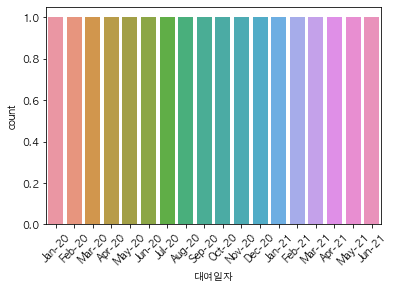

In [330]:
sns.countplot(x='대여일자', data=bike_sum)
plt.xticks(rotation=45)

##### 02) 소계 데이터셋으로 카운트플롯 사용하는 것은 잘못된 접근

### 03) 월별 공공 자전거 남성 이용 건수 ( 선 그래프 )

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

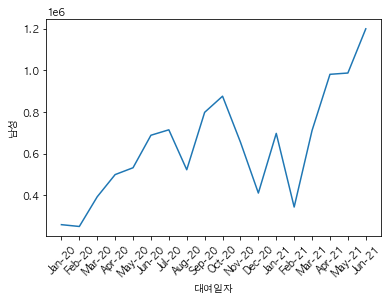

In [331]:
# 남성 이용객의 대여일자별 이용건수
sns.lineplot(x='대여일자', y='남성', data=bike_sum)
plt.xticks(rotation=45)

### 03) 월별 공공 자전거 남성 이용 건수( 막대그래프 )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Jan-20'),
  Text(1, 0, 'Feb-20'),
  Text(2, 0, 'Mar-20'),
  Text(3, 0, 'Apr-20'),
  Text(4, 0, 'May-20'),
  Text(5, 0, 'Jun-20'),
  Text(6, 0, 'Jul-20'),
  Text(7, 0, 'Aug-20'),
  Text(8, 0, 'Sep-20'),
  Text(9, 0, 'Oct-20'),
  Text(10, 0, 'Nov-20'),
  Text(11, 0, 'Dec-20'),
  Text(12, 0, 'Jan-21'),
  Text(13, 0, 'Feb-21'),
  Text(14, 0, 'Mar-21'),
  Text(15, 0, 'Apr-21'),
  Text(16, 0, 'May-21'),
  Text(17, 0, 'Jun-21')])

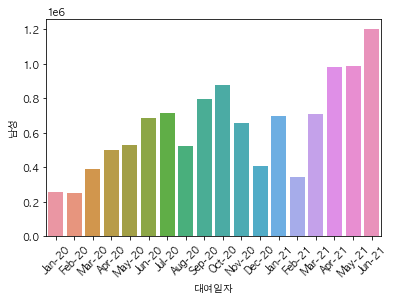

In [332]:
sns.barplot(x='대여일자', y='남성', data=bike_sum)
plt.xticks(rotation=45)

### 04 )데이터 셋 불러오기 : 2020년 공공자전거 이용정보

In [342]:
bike_2020 = pd.read_csv('./data_set/공공자전거 이용정보(2020년 전월).csv', encoding = 'cp949')
bike_2020.columns

Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리', '이용시간', '여성', '남성', '미상', '총 이용건수', 'AGE_001', 'AGE_002',
       'AGE_003', 'AGE_004', 'AGE_005', 'AGE_006', 'AGE_007', 'AGE_008',
       'AGE_009'],
      dtype='object')

### 05) 데이터 전처리 : 필요없는 컬럼 삭제

In [343]:
bike_2020.drop(['여성', '남성', '미상', '총 이용건수', 'AGE_001', 'AGE_002',
       'AGE_003', 'AGE_004', 'AGE_005', 'AGE_006', 'AGE_007', 'AGE_008',
       'AGE_009'],axis=1)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,20-Jan,3,중랑센터,일일(회원),M,AGE_003,3,61.82,0.52,2230.0,75
1,20-Jan,3,중랑센터,일일(회원),M,AGE_004,1,39.62,0.28,1220.0,15
2,20-Jan,3,중랑센터,정기,M,AGE_005,3,430.85,4.01,17270.0,53
3,20-Jan,5,상암센터 정비실,일일(회원),\N,AGE_005,2,1.79,0.02,90.0,33
4,20-Jan,5,상암센터 정비실,정기,F,AGE_003,1,4501.96,45.47,196010.0,64
...,...,...,...,...,...,...,...,...,...,...,...
948882,20-Dec,9999,시스템관리팀,정기,F,AGE_006,1,0.00,0.00,0.0,0
948883,20-Dec,9999,시스템관리팀,정기,M,AGE_003,2,0.00,0.00,0.0,76
948884,20-Dec,9999,시스템관리팀,정기,M,AGE_004,1,0.00,0.00,0.0,15
948885,20-Dec,99999,99999. 영남단말기정비,정기,\N,AGE_008,7,0.00,0.00,0.0,18


### 06) 데이터 전처리 : 남녀 성별 컬럼의 결측치 처리 및 값 통일

In [347]:
# NULL 값이 있으면 'Unknwon'으로 채워준다.
bike_2020['성별'] = bike_2020['성별'].fillna('Unknown')
bike_2020['성별'].isnull().sum()

0

In [348]:
# 컬럼의 각 요소값 별로 데이터 수 확인
bike_2020['성별'].value_counts()

Unknown    472632
M          251108
F          225147
Name: 성별, dtype: int64

In [345]:
# M과 m을 m으로, F와 f를 f로, Nan와 \\N를 nan으로 통합
print('통일 전 <성별>컬럼에 있는 유니크 값 : ', bike_2020['성별'].unique())
bike_2020['성별'] = bike_2020['성별'].map({'m':'M','M':'M',   'f':'F','F':"F",   '\\N':'Unknown'})
print('통일 후 <성별>컬럼에 있는 유니크 값 : ', bike_2020['성별'].unique())

통일 전 <성별>컬럼에 있는 유니크 값 :  ['M' '\\N' 'F']
통일 후 <성별>컬럼에 있는 유니크 값 :  ['M' 'Unknown' 'F']


In [ ]:
# 여자-0, 남자-1, 알수없음-2
#bike_2020['성별'] =  bike_2020['성별'].map({'F':0,'0':0,     'M':1,'1':1,      'Unknwon' :2})
bike_2020['성별'].unique()

In [352]:
# 확인
bike_2020[['대여일자','성별','연령대코드','이용건수','운동량','이동거리','이용시간']]

,대여일자,성별,연령대코드,이용건수,운동량,이동거리,이용시간
0,20-Jan,M,AGE_003,3,61.82,2230.0,75
1,20-Jan,M,AGE_004,1,39.62,1220.0,15
2,20-Jan,M,AGE_005,3,430.85,17270.0,53
3,20-Jan,Unknown,AGE_005,2,1.79,90.0,33
4,20-Jan,F,AGE_003,1,4501.96,196010.0,64
...,...,...,...,...,...,...,...
948882,20-Dec,F,AGE_006,1,0.00,0.0,0
948883,20-Dec,M,AGE_003,2,0.00,0.0,76
948884,20-Dec,M,AGE_004,1,0.00,0.0,15
948885,20-Dec,Unknown,AGE_008,7,0.00,0.0,18


### 07) 월별 공공 자전거 총 이용건수 ( 데이터 셋: 2020년 )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '20-Jan'),
  Text(1, 0, '20-Feb'),
  Text(2, 0, '20-Mar'),
  Text(3, 0, '20-Apr'),
  Text(4, 0, '20-May'),
  Text(5, 0, '20-Jun'),
  Text(6, 0, '20-Jul'),
  Text(7, 0, '20-Aug'),
  Text(8, 0, '20-Sep'),
  Text(9, 0, '20-Oct'),
  Text(10, 0, '20-Nov'),
  Text(11, 0, '20-Dec')])

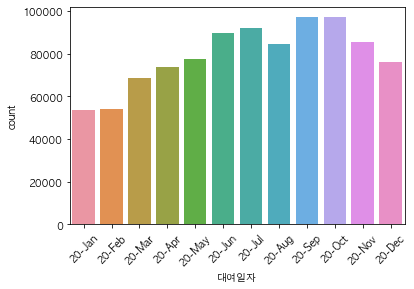

In [353]:
sns.countplot(x='대여일자', data=bike_2020)
plt.xticks(rotation=45)

### 08) 성별 공공 자전거 총 이용건수 ( 데이터 셋: 2020년 )

<AxesSubplot:xlabel='성별', ylabel='count'>

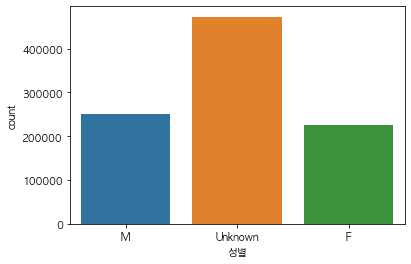

In [357]:
sns.countplot(x='성별',data=bike_2020)

##### 08 결론) 성별을 알수없는 이용객이 2배이상 많아서 성별로 구분하는 것은 어려울 듯 하다.

### 08-2) 성별 공공 자전거 한 사람당 평균 이용건수 ( 데이터 셋: 2020년 )

<AxesSubplot:xlabel='성별', ylabel='이용건수'>

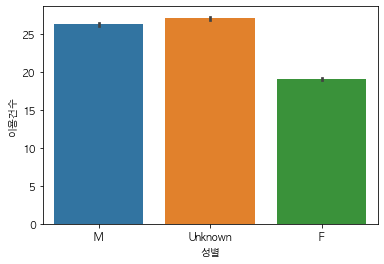

In [358]:
sns.barplot(x='성별', y='이용건수',data=bike_2020)

### 09) 성별에 따른 월별 공공 자전거 총 이용건수 ( 데이터 셋: 2020년 )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '20-Jan'),
  Text(1, 0, '20-Feb'),
  Text(2, 0, '20-Mar'),
  Text(3, 0, '20-Apr'),
  Text(4, 0, '20-May'),
  Text(5, 0, '20-Jun'),
  Text(6, 0, '20-Jul'),
  Text(7, 0, '20-Aug'),
  Text(8, 0, '20-Sep'),
  Text(9, 0, '20-Oct'),
  Text(10, 0, '20-Nov'),
  Text(11, 0, '20-Dec')])

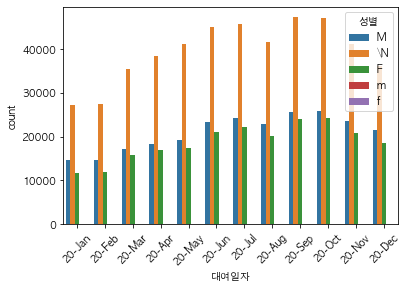

In [60]:
sns.countplot(x='대여일자', hue='성별',data=bike_2020)
plt.xticks(rotation=45)

### 10) 성별 이용시간 차이

<AxesSubplot:xlabel='성별', ylabel='이용시간'>

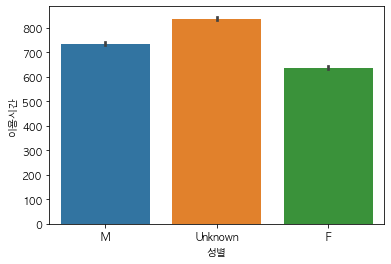

In [359]:
sns.barplot(x='성별', y='이용시간',data=bike_2020)

##### 10 결론) 알수없는 성별의 케이스가 너무 많아서 부정확하다.

### 10) 성별에 따른 운동량 데이터 전처리
  * 운동량 컬럼의 결측치 처리
  * 운동량 컬럼의 모든 요소 값을 숫자형태로 mapping
  * 운동량 컬럼의 모든 요소 값을 숫자형태로 자료형변환

In [282]:
bike_2020 = pd.read_csv('./data_set/공공자전거 이용정보(2020년 전월).csv', encoding = 'cp949')
bike_2020['성별'] = bike_2020['성별'].map({'m':'M','M':'M',   'f':'F','F':"F",   '\\N':'Unknown'})
bike_2020[['대여일자','성별','연령대코드','이용건수','운동량','이동거리','이용시간']]

,대여일자,성별,연령대코드,이용건수,운동량,이동거리,이용시간
0,20-Jan,M,AGE_003,3,61.82,2230.0,75
1,20-Jan,M,AGE_004,1,39.62,1220.0,15
2,20-Jan,M,AGE_005,3,430.85,17270.0,53
3,20-Jan,Unknown,AGE_005,2,1.79,90.0,33
4,20-Jan,F,AGE_003,1,4501.96,196010.0,64
...,...,...,...,...,...,...,...
948882,20-Dec,F,AGE_006,1,0.00,0.0,0
948883,20-Dec,M,AGE_003,2,0.00,0.0,76
948884,20-Dec,M,AGE_004,1,0.00,0.0,15
948885,20-Dec,Unknown,AGE_008,7,0.00,0.0,18


In [274]:
bike_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948887 entries, 0 to 948886
Data columns (total 24 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     948887 non-null  object 
 1   대여소번호    948887 non-null  int64  
 2   대여소명     948887 non-null  object 
 3   대여구분코드   948887 non-null  object 
 4   성별       948887 non-null  object 
 5   연령대코드    948887 non-null  object 
 6   이용건수     948887 non-null  int64  
 7   운동량      948887 non-null  float64
 8   탄소량      948887 non-null  float64
 9   이동거리     948887 non-null  float64
 10  이용시간     948887 non-null  int64  
 11  여성       12 non-null      float64
 12  남성       12 non-null      float64
 13  미상       12 non-null      float64
 14  총 이용건수   12 non-null      float64
 15  AGE_001  12 non-null      float64
 16  AGE_002  12 non-null      float64
 17  AGE_003  12 non-null      float64
 18  AGE_004  12 non-null      float64
 19  AGE_005  12 non-null      float64
 20  AGE_006  12 non-null      

* 운동량의 non-null을 보아 null값이 없다는 걸 알 수 있다.
* 즉, \N은 NULL이 아니라 문자열로 들어가있다는 것을 알 수있다.
* 또한, bike_2020['운동량'] = bike_2020['운동량'].fillna('0') 을 굳이 해 줄 필요가 없다.
* 애초에 NULL값이 없으니까!

In [275]:
bike_2020['운동량'].tail(20).unique()

array([3.39170e+02, 0.00000e+00, 3.79500e+02, 4.48600e+01, 2.60000e-01,
       2.28900e+01, 6.20000e-01, 2.13408e+03])

* \N로 표시된 값이 실제로 작은 따옴표로 '\\N'으로 표시되어있는 걸로 보아, NULL값이 아니라 문자열로 저장되어있음을 알 수 있다.

In [276]:
bike_2020['운동량'].value_counts()

0.00        292258
43.24          147
46.33          138
36.04          130
21.62          126
             ...  
5793.66          1
2517.05          1
8107.41          1
7835.99          1
21061.22         1
Name: 운동량, Length: 279971, dtype: int64

# map 이용시 주의 사항!!!!!!!!!
 * \N이 있는 칸은 0으로 바꾸기 위해 dataframe_name['column_name']map({'\\N':0})을 사용하게 되면,
 * 해당 컬럼의 값이 '\\N'인 자료들은 모두 0 으로 바뀌지만,
 * map에 따로 정의하지 않았던 자료들이 모두 nan으로 바뀌는 부작용이 생긴다.
 * 즉, map을 통해 요소값을 바꿔주려면, 수정하고 싶지 않은 데이터에 대해서도 모두 정의해주어야한다.
 * ex) dataframe_name['column_name']map({'\\N':0, '0':'0', '43.21':'43.21','339.17':'339.17', '379.5':'379.5'})
 * 그래서 unique()값이 다양하면 다양할수록 map하는데 어려움이있다.

In [360]:
# 운동량 컬럼에 \N이 있는 칸은 0으로 바꾼다.
# print('값 변환 전 :',bike_2020['운동량'].unique())
# bike_2020['운동량'] = bike_2020['운동량'].map({'\\N':0, '0':0})

# print('값 변환 후 :',bike_2020['운동량'].unique())
bike_2020[['대여일자','성별','연령대코드','이용건수','운동량','이동거리','이용시간']]

,대여일자,성별,연령대코드,이용건수,운동량,이동거리,이용시간
0,20-Jan,M,AGE_003,3,61.82,2230.0,75
1,20-Jan,M,AGE_004,1,39.62,1220.0,15
2,20-Jan,M,AGE_005,3,430.85,17270.0,53
3,20-Jan,Unknown,AGE_005,2,1.79,90.0,33
4,20-Jan,F,AGE_003,1,4501.96,196010.0,64
...,...,...,...,...,...,...,...
948882,20-Dec,F,AGE_006,1,0.00,0.0,0
948883,20-Dec,M,AGE_003,2,0.00,0.0,76
948884,20-Dec,M,AGE_004,1,0.00,0.0,15
948885,20-Dec,Unknown,AGE_008,7,0.00,0.0,18


In [283]:
print('자료형 변환 전 :', bike_2020['운동량'].dtypes)
bike_2020['운동량'] = bike_2020['운동량'].astype('float64')
print('자료형 변환 후 :',bike_2020['운동량'].dtypes)

자료형 변환 전 : float64
자료형 변환 후 : float64


### 10) 성별에 따른 운동량 차이 그래프 시각화

<AxesSubplot:xlabel='성별', ylabel='운동량'>

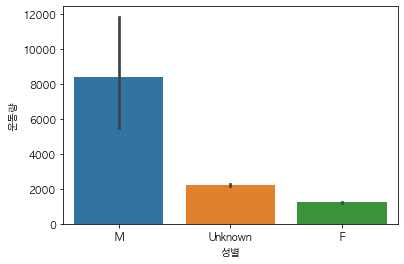

In [284]:
sns.barplot(x='성별', y='운동량',data=bike_2020)

### 11) 성별에 따른 이용시간 대비 운동량 : 운동량 / 이용시간
  * bike_2020.loc[2,['운동량']]만 쓰면 Series형태로 인덱스값과 같이 추출 되기 때문에
  * .values를 통해 숫자값만 추출해야한다.

In [324]:
bike_2020.loc[1,['이용시간']].values == 15

array([ True])

In [320]:
if bike_2020['이용시간'].values == 0:
    bike_2020['운동강도'].values = 0
else :
    bike_2020['운동강도'].values = bike_2020['운동량'].values/ bike_2020['이용시간'].values

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [325]:
for i in range(948887):
    if bike_2020.loc[i,['이용시간']].values == 0:
        bike_2020.loc[i,['운동강도']].values = 0
    else :
        bike_2020.loc[i,['운동강도']].values = bike_2020.loc[i,['운동량']].values/ bike_2020.loc[i,['이용시간']].values

AttributeError: can't set attribute

<ipython-input-326-3f99a598931f>:1: RuntimeWarning: divide by zero encountered in true_divide
  sns.barplot(x='성별', y=bike_2020['운동량'].values/ bike_2020['이용시간'].values ,data=bike_2020)
<ipython-input-326-3f99a598931f>:1: RuntimeWarning: invalid value encountered in true_divide
  sns.barplot(x='성별', y=bike_2020['운동량'].values/ bike_2020['이용시간'].values ,data=bike_2020)
/Users/works/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<AxesSubplot:xlabel='성별'>

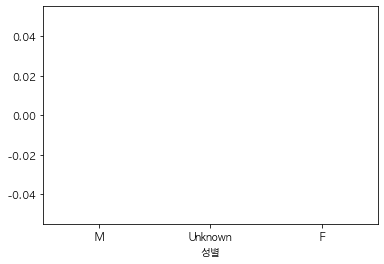

In [326]:
sns.barplot(x='성별', y=bike_2020['운동량'].values/ bike_2020['이용시간'].values ,data=bike_2020)

### 12) 성별에 따른 이동거리 차이

### 13) 성별에 따른 주행속도 차이 : 이동거리 / 이용시간

In [ ]:
sns.barplot(x)

### 14) 나이대별 총 이용건수

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'AGE_003'),
  Text(1, 0, 'AGE_004'),
  Text(2, 0, 'AGE_005'),
  Text(3, 0, 'AGE_008'),
  Text(4, 0, 'AGE_002'),
  Text(5, 0, 'AGE_006'),
  Text(6, 0, 'AGE_001'),
  Text(7, 0, 'AGE_007')])

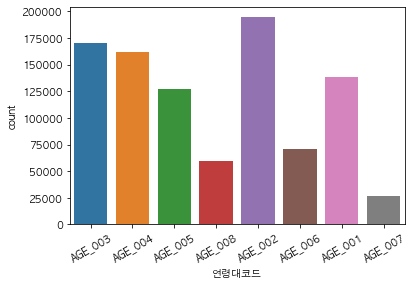

In [374]:
sns.countplot(x='연령대코드',data=bike_2020)
plt.xticks(rotation=30)

#### 14) AGE_03부터 시작함. 따라서 AGE_01부터 AGE_09까지 sort_values 한 후 시각화하면 x labels이 정렬될듯?

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'AGE_001'),
  Text(1, 0, 'AGE_002'),
  Text(2, 0, 'AGE_003'),
  Text(3, 0, 'AGE_004'),
  Text(4, 0, 'AGE_005'),
  Text(5, 0, 'AGE_006'),
  Text(6, 0, 'AGE_007'),
  Text(7, 0, 'AGE_008')])

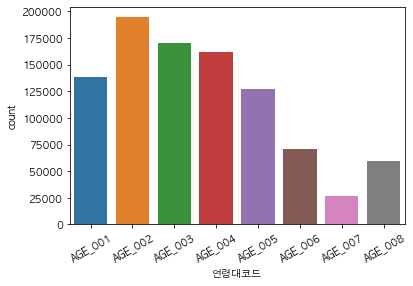

In [377]:
bike_2020=bike_2020.sort_values(by='연령대코드', ascending=True)
sns.countplot(x='연령대코드',data=bike_2020)
plt.xticks(rotation=30)